In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


In [2]:
df = pd.read_csv("customers.csv")

In [4]:
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


In [5]:
print("Shape:", df.shape)

Shape: (200, 5)


In [6]:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
# Check data types
print("Data Types:\n", df.dtypes)

Data Types:
 CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [8]:
print("Summary Statistics:\n", df.describe())

Summary Statistics:
        CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [13]:
#Standardize the Data:
from sklearn.preprocessing import StandardScaler

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[features])


# Convert scaled data back to a DataFrame for convenience
df_scaled = pd.DataFrame(df_scaled, columns=features)


In [14]:
#clustering
wcss = []
for i in range(1, 11):  # Check for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)



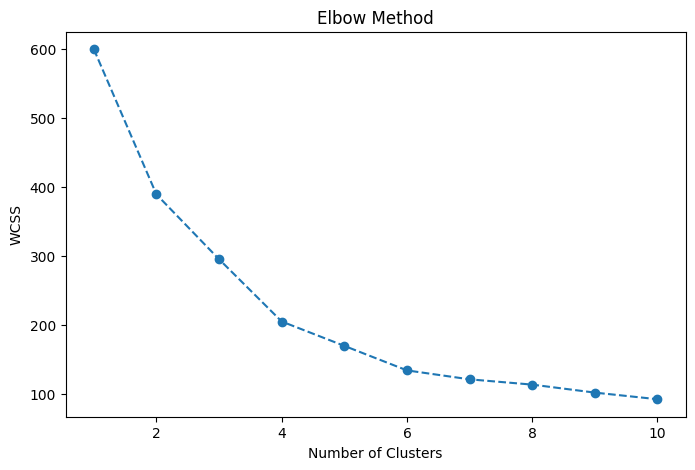

In [15]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [16]:
for n_clusters in range(2, 11):  # Check for 2 to 10 clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print(f"Number of Clusters: {n_clusters}, Silhouette Score: {silhouette_avg}")


Number of Clusters: 2, Silhouette Score: 0.33547192894004574
Number of Clusters: 3, Silhouette Score: 0.3579234303882264
Number of Clusters: 4, Silhouette Score: 0.4039582785148566
Number of Clusters: 5, Silhouette Score: 0.40846873777345605
Number of Clusters: 6, Silhouette Score: 0.43106526216603014
Number of Clusters: 7, Silhouette Score: 0.410091114520974
Number of Clusters: 8, Silhouette Score: 0.3673663165322295
Number of Clusters: 9, Silhouette Score: 0.37442148555078425
Number of Clusters: 10, Silhouette Score: 0.36186970479722974


In [17]:
optimal_clusters = 3  # Replace with the determined value
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)


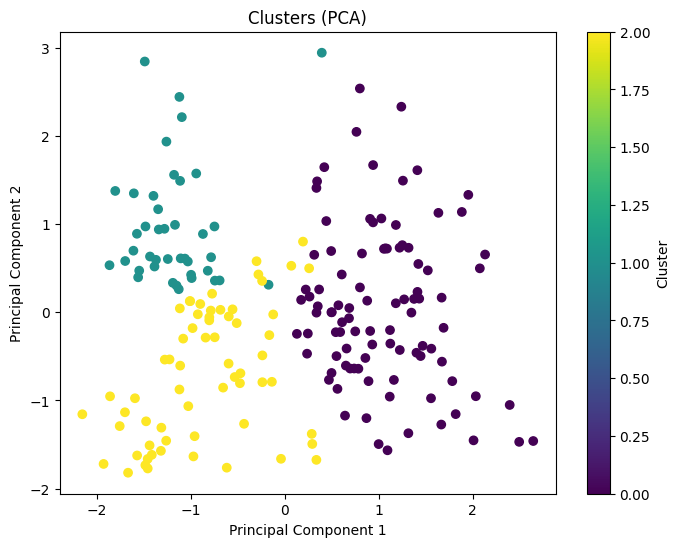

In [18]:
#2D scatterplot with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis')
plt.title("Clusters (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(scatter, label='Cluster')
plt.show()

C:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


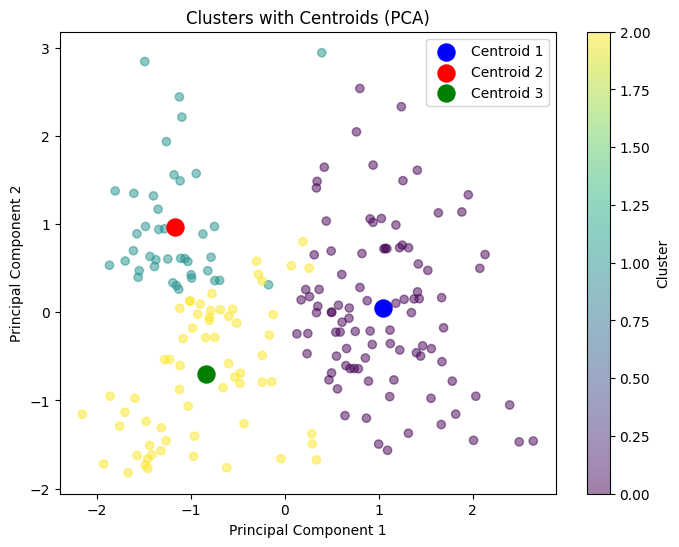

In [28]:
centroids = kmeans.cluster_centers_
pca_centroids = pca.transform(centroids)

# Define specific dark colors for each centroid
centroid_colors = ['blue', 'red', 'green', ]

plt.figure(figsize=(8, 6))

# Scatter plot for the data points
scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.5)

# Scatter plot for centroids with specific colors
for i, centroid in enumerate(pca_centroids):
    plt.scatter(centroid[0], centroid[1], c=centroid_colors[i], marker='o', s=150, label=f'Centroid {i + 1}')

plt.title("Clusters with Centroids (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.colorbar(scatter, label='Cluster')
plt.show()
